In [1]:
#fetching files from Amazon S3

!wget https://ist664yash.s3.amazonaws.com/project+data/business.csv
!wget https://ist664yash.s3.amazonaws.com/project+data/review.csv
!wget https://ist664yash.s3.amazonaws.com/project+data/tip.csv
!wget https://ist664yash.s3.amazonaws.com/project+data/user2.csv
!wget https://ist664yash.s3.amazonaws.com/project+data/sentiment_for+review_text.csv

--2022-05-09 00:36:34--  https://ist664yash.s3.amazonaws.com/project+data/business.csv
Resolving ist664yash.s3.amazonaws.com (ist664yash.s3.amazonaws.com)... 54.231.130.25
Connecting to ist664yash.s3.amazonaws.com (ist664yash.s3.amazonaws.com)|54.231.130.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100020213 (95M) [text/csv]
Saving to: ‘business.csv’

business.csv        100%[===================>]  95.39M  33.4MB/s    in 2.9s    

2022-05-09 00:36:38 (33.4 MB/s) - ‘business.csv’ saved [100020213/100020213]

--2022-05-09 00:36:38--  https://ist664yash.s3.amazonaws.com/project+data/review.csv
Resolving ist664yash.s3.amazonaws.com (ist664yash.s3.amazonaws.com)... 54.231.130.25
Connecting to ist664yash.s3.amazonaws.com (ist664yash.s3.amazonaws.com)|54.231.130.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 670320703 (639M) [text/csv]
Saving to: ‘review.csv’

review.csv          100%[===================>] 639.27M  46.2MB/s    in 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import re

### USER JSON

In [3]:
user_df = pd.read_csv('user2.csv',).drop(['Unnamed: 0.1'],axis=1).drop(['Unnamed: 0'],axis=1)
user_df.head(3)

,user_id,name,review_count,useful,funny,cool,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,7217,1259,5994,2007,267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2086,1010,1003,"2009,2010,2011,2012,2013",52,3.32,89,13,10,17,3,66,96,119,119,35,18


In [4]:
#elite year column generation
a = user_df['elite'].tolist()

col_df = pd.DataFrame(a,columns =['elite'])
col_df['elite'] = col_df['elite'].fillna(0)
col_df = col_df.astype(str)
elite_col = []

for i in range (1500000):
  if col_df['elite'][i] == '0':
    elite_col.append(0)
  else:
    z = col_df['elite'][i].count(",") + 1
    elite_col.append(z)

In [5]:
user_df = user_df.drop('elite', axis =1)
user_df['Elite years'] = elite_col
user_df.head()

,user_id,name,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,Elite years
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,7217,1259,5994,267,3.91,250,65,55,56,18,232,844,467,467,239,180,1
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,43091,13066,27281,3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946,14
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2086,1010,1003,52,3.32,89,13,10,17,3,66,96,119,119,35,18,5
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,512,330,299,28,4.27,24,4,1,6,2,12,16,26,26,10,9,3
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,29,15,7,1,3.54,1,1,0,0,0,1,1,0,0,0,0,0


In [6]:
#comp total
columns_list = ['compliment_hot','compliment_more','compliment_profile','compliment_cute','compliment_list','compliment_note','compliment_plain','compliment_cool','compliment_funny','compliment_writer','compliment_photos']
user_df['compliment_total'] = user_df[columns_list].sum(axis=1)
user_df = user_df.drop(columns_list, axis = 1)

In [7]:
# Count number of zeros in all columns of Dataframe
for column_name in user_df.columns:
    column = user_df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  user_id  is :  0
Count of zeros in column  name  is :  0
Count of zeros in column  review_count  is :  36
Count of zeros in column  useful  is :  350875
Count of zeros in column  funny  is :  775023
Count of zeros in column  cool  is :  728522
Count of zeros in column  fans  is :  1152788
Count of zeros in column  average_stars  is :  0
Count of zeros in column  Elite years  is :  1417061
Count of zeros in column  compliment_total  is :  980131


In [8]:
user_df

,user_id,name,review_count,useful,funny,cool,fans,average_stars,Elite years,compliment_total
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,7217,1259,5994,267,3.91,1,2873
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,43091,13066,27281,3138,3.74,14,20631
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2086,1010,1003,52,3.32,5,585
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,512,330,299,28,4.27,3,136
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,29,15,7,1,3.54,0,4
...,...,...,...,...,...,...,...,...,...,...
1499995,-CDGsWsvWsGm9746axpxYA,Franklin L,1,0,0,0,0,4.00,0,0
1499996,9DMN0sJ6sFvIm5DUSyO3JQ,Johnny,1,0,0,0,0,5.00,0,0
1499997,DQ2sNb0mDfMB094F3xl77w,Junior,17,4,0,0,0,4.47,0,0
1499998,Gftq7FhsGZ1soxVqlz9hXA,Matt,2,0,0,0,0,1.00,0,0


In [9]:
#popularity score
user_df['Popularity Score'] = user_df['review_count'] * 0.4 + user_df['useful'] * 0.1 
+ user_df['funny'] * 0.1 +user_df['cool'] * 0.1 
+user_df['fans'] * 0.4 +user_df['average_stars'] * 0.3 
+user_df['Elite years'] * 0.5 + user_df['compliment_total'] * 0.3

0           862.4
1          6196.3
2           178.0
3            42.3
4             1.2
            ...  
1499995       0.0
1499996       0.0
1499997       0.0
1499998       0.0
1499999       0.0
Length: 1500000, dtype: float64

In [10]:
print("50% ",user_df['Popularity Score'].quantile(q=0.50)) #Not popular
print("80% ",user_df['Popularity Score'].quantile(q=0.8))  #moderate
print("90% ",user_df['Popularity Score'].quantile(q=0.90)) #popular
print("95% ",user_df['Popularity Score'].quantile(q=0.95)) #very popular

50%  3.1
80%  12.500000000000002
90%  27.900000000000002
95%  57.2


In [11]:
popularity = []
for i in range(1500000):
  if user_df['Popularity Score'][i] <=5 :
    popularity.append("Not Popular")
  elif user_df['Popularity Score'][i] > 5 and user_df['Popularity Score'][i] <= 13 :
    popularity.append("Moderately Popular")
  elif user_df['Popularity Score'][i] > 13 and user_df['Popularity Score'][i] <=27 :
    popularity.append("Popular")
  else:
    popularity.append("Very Popular")
   
user_df['popularity'] = popularity

In [12]:
user_df

,user_id,name,review_count,useful,funny,cool,fans,average_stars,Elite years,compliment_total,Popularity Score,popularity
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,7217,1259,5994,267,3.91,1,2873,955.7,Very Popular
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,43091,13066,27281,3138,3.74,14,20631,6042.3,Very Popular
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2086,1010,1003,52,3.32,5,585,474.6,Very Popular
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,512,330,299,28,4.27,3,136,140.8,Very Popular
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,29,15,7,1,3.54,0,4,34.5,Very Popular
...,...,...,...,...,...,...,...,...,...,...,...,...
1499995,-CDGsWsvWsGm9746axpxYA,Franklin L,1,0,0,0,0,4.00,0,0,0.4,Not Popular
1499996,9DMN0sJ6sFvIm5DUSyO3JQ,Johnny,1,0,0,0,0,5.00,0,0,0.4,Not Popular
1499997,DQ2sNb0mDfMB094F3xl77w,Junior,17,4,0,0,0,4.47,0,0,7.2,Moderately Popular
1499998,Gftq7FhsGZ1soxVqlz9hXA,Matt,2,0,0,0,0,1.00,0,0,0.8,Not Popular


In [13]:
u_col = ['user_id','name', 'Popularity Score', 'popularity']
user_df = user_df[u_col]
user_df.rename(columns = {'name':'Username'}, inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
user_df

,user_id,Username,Popularity Score,popularity
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,955.7,Very Popular
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,6042.3,Very Popular
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,474.6,Very Popular
3,SZDeASXq7o05mMNLshsdIA,Gwen,140.8,Very Popular
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,34.5,Very Popular
...,...,...,...,...
1499995,-CDGsWsvWsGm9746axpxYA,Franklin L,0.4,Not Popular
1499996,9DMN0sJ6sFvIm5DUSyO3JQ,Johnny,0.4,Not Popular
1499997,DQ2sNb0mDfMB094F3xl77w,Junior,7.2,Moderately Popular
1499998,Gftq7FhsGZ1soxVqlz9hXA,Matt,0.8,Not Popular


### Review JSON

In [15]:
review_df = pd.read_csv('review.csv',).drop(['Unnamed: 0'],axis=1)
review_df.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30


In [16]:
#reading csv with predicted sentiment generated from another file
sentiment_df = pd.read_csv('sentiment_for+review_text.csv',).drop(['Unnamed: 0'],axis=1)
sentiment_df = sentiment_df.drop('text', axis=1)

In [17]:
review_df['sentiment'] = sentiment_df


In [18]:
review_df = review_df.drop('date', axis =1)

In [19]:
r_col = review_df.columns.tolist()
r_col.remove('stars')
r_col.remove('useful')
r_col.remove('funny')
r_col.remove('cool')


review_clean_df = review_df[r_col]
review_clean_df

,review_id,user_id,business_id,text,sentiment
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,"If you decide to eat here, just be aware it is...",Positive
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,I've taken a lot of spin classes over the year...,Positive
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,Family diner. Had the buffet. Eclectic assortm...,Positive
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,"Wow! Yummy, different, delicious. Our favo...",Positive
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,Cute interior and owner (?) gave us tour of up...,Positive
...,...,...,...,...,...
999995,t-2o35kr7Q9DSaeuKhaDuQ,oX7o1TH0PHUWp9r9ry9_vw,jLn69WQupjsDKrbPw_nlGQ,Never really had any issues here other than th...,NaN
999996,fLIwWCvdul9PNWYfJt5QWA,v8wlapFKVLs2qTYCGhCdiw,t6v8g8UeNiq3O2GoEc7R4Q,Fish recently moved a couple of doors down the...,NaN
999997,ETAiy6wEM-r9ve4SKDhBpg,rLlYc1RzIBnOmnX3AbpEYw,ZYRul0i1bhOjirHED6Kd0w,I've been to South House around a dozen or so ...,NaN
999998,8OgvSXuc6KjAt2fSz9LuzA,eEH-8CEPU5ndPxDGzVfHiQ,onGXKwnxPLtKnO8yqQMPSA,Wow! I am shocked at these reviews. I have tri...,NaN


### Business JSON

In [20]:
business_df = pd.read_csv('business.csv',).drop(['Unnamed: 0'],axis=1)
business_df.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [21]:
business_df = business_df.drop(['address', 'postal_code','latitude','longitude','is_open','attributes','hours'], axis =1)

In [22]:
business_df.rename(columns = {'name':'Business Name'}, inplace = True)
business_df

,business_id,Business Name,city,state,stars,review_count,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",Santa Barbara,CA,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,Affton,MO,3.0,15,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,Tucson,AZ,3.5,22,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,Green Lane,PA,4.5,13,"Brewpubs, Breweries, Food"
...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,Edmonton,AB,3.0,13,"Nail Salons, Beauty & Spas"
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,Nashville,TN,4.0,5,"Pets, Nurseries & Gardening, Pet Stores, Hobby..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,Indianapolis,IN,3.5,8,"Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,Edwardsville,IL,4.0,24,"Fitness/Exercise Equipment, Eyewear & Optician..."


### Tip JSON

In [23]:
tip_df = pd.read_csv('tip.csv',).drop(['Unnamed: 0'],axis=1)
tip_df.head(3)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0


### DATA PREP


Merging Dataframes for drawing inferences

In [24]:
final_df = pd.merge(review_clean_df, user_df, on='user_id')
final_df = pd.merge(final_df, business_df, on='business_id')

final_clean_df = final_df.drop('review_id', axis =1)
final_clean_df = final_clean_df.drop('user_id', axis =1)
final_clean_df = final_clean_df.drop('business_id', axis =1)


final_clean_df.head()

,text,sentiment,Username,Popularity Score,popularity,Business Name,city,state,stars,review_count,categories
0,"If you decide to eat here, just be aware it is...",Positive,Melanie,16.4,Popular,Turning Point of North Wales,North Wales,PA,3.0,169,"Restaurants, Breakfast & Brunch, Food, Juice B..."
1,"Excellent food but slow, slow, slow. Staff nee...",Positive,Phyllis,20.2,Popular,Turning Point of North Wales,North Wales,PA,3.0,169,"Restaurants, Breakfast & Brunch, Food, Juice B..."
2,"After reading a ton of mixed reviews, my fianc...",NaN,Gabby,2.8,Not Popular,Turning Point of North Wales,North Wales,PA,3.0,169,"Restaurants, Breakfast & Brunch, Food, Juice B..."
3,Stopped in for lunch on a Sat afternoon and lu...,NaN,Charles,237.5,Very Popular,Turning Point of North Wales,North Wales,PA,3.0,169,"Restaurants, Breakfast & Brunch, Food, Juice B..."
4,I really wanted to love this restaurant. The ...,Positive,Zach,277.0,Very Popular,Turning Point of North Wales,North Wales,PA,3.0,169,"Restaurants, Breakfast & Brunch, Food, Juice B..."


In [27]:
final_clean_df =final_clean_df.dropna()

In [28]:
final_clean_df['sentiment'].isna().sum()

0

In [31]:
final_clean_df['categories'][0]

'Restaurants, Breakfast & Brunch, Food, Juice Bars & Smoothies, American (New), Coffee & Tea, Sandwiches'

### INFERENCE and FINDINGS

In [45]:
#restraunts
restraunts_df = final_clean_df.loc[final_clean_df['categories'] == "Restaurants, Breakfast & Brunch, Food, Juice Bars & Smoothies, American (New), Coffee & Tea, Sandwiches"]


In [60]:
restraunts_df = restraunts_df.drop(['text','categories'], axis = 1)

In [61]:
restraunts_df

,sentiment,Username,Popularity Score,popularity,Business Name,city,state,stars,review_count
0,Positive,Melanie,16.4,Popular,Turning Point of North Wales,North Wales,PA,3.0,169
1,Positive,Phyllis,20.2,Popular,Turning Point of North Wales,North Wales,PA,3.0,169
4,Positive,Zach,277.0,Very Popular,Turning Point of North Wales,North Wales,PA,3.0,169
5,Negative,John,3.9,Not Popular,Turning Point of North Wales,North Wales,PA,3.0,169
6,Positive,Stella,75.6,Very Popular,Turning Point of North Wales,North Wales,PA,3.0,169
...,...,...,...,...,...,...,...,...,...
989945,Positive,Sandra,2.3,Not Popular,US Storage Centers,Brentwood,TN,4.0,9
989955,Positive,Jennifer,9.9,Moderately Popular,Rod's Auto Repair,Boise,ID,4.0,6
990061,Positive,Laura,6.6,Moderately Popular,Ashtanga Santa Barbara,Santa Barbara,CA,5.0,7
990111,Positive,Matthew,2.0,Not Popular,Alton Memorial Hospital,Alton,IL,2.5,7


In [74]:
restraunts_df = restraunts_df.loc[restraunts_df['sentiment'] == "Positive"]

In [75]:
restraunts_df

,sentiment,Username,Popularity Score,popularity,Business Name,city,state,stars,review_count
0,Positive,Melanie,16.4,Popular,Turning Point of North Wales,North Wales,PA,3.0,169
1,Positive,Phyllis,20.2,Popular,Turning Point of North Wales,North Wales,PA,3.0,169
4,Positive,Zach,277.0,Very Popular,Turning Point of North Wales,North Wales,PA,3.0,169
6,Positive,Stella,75.6,Very Popular,Turning Point of North Wales,North Wales,PA,3.0,169
7,Positive,Stephanie,93.7,Very Popular,Turning Point of North Wales,North Wales,PA,3.0,169
...,...,...,...,...,...,...,...,...,...
989945,Positive,Sandra,2.3,Not Popular,US Storage Centers,Brentwood,TN,4.0,9
989955,Positive,Jennifer,9.9,Moderately Popular,Rod's Auto Repair,Boise,ID,4.0,6
990061,Positive,Laura,6.6,Moderately Popular,Ashtanga Santa Barbara,Santa Barbara,CA,5.0,7
990111,Positive,Matthew,2.0,Not Popular,Alton Memorial Hospital,Alton,IL,2.5,7


In [82]:
abc = restraunts_df.groupby(['Business Name','sentiment'])['sentiment'].count()
abc.sort_values(ascending = False)

Business Name                 sentiment
Luke                          Positive     2211
Peppermill Reno               Positive     1019
Surrey's Café & Juice Bar     Positive     1012
Mr. B's Bistro                Positive      980
District Donuts Sliders Brew  Positive      915
                                           ... 
Meng Ting Chinese Restaurant  Positive        1
Third Coast Customs           Positive        1
Downtown Boise YMCA           Positive        1
Thies Farm and Greenhouses    Positive        1
Briarwood Day Camp            Positive        1
Name: sentiment, Length: 9975, dtype: int64

In [117]:
Luke_df = final_clean_df.loc[final_clean_df['Business Name'] == "Luke"].reset_index()

In [118]:
Luke_df

,index,text,sentiment,Username,Popularity Score,popularity,Business Name,city,state,stars,review_count,categories
0,61825,A very good meal at a decent price. We got th...,Positive,Steve,88.6,Very Popular,Luke,New Orleans,LA,4.0,4554,"Restaurants, Breakfast & Brunch, Food, Juice B..."
1,61826,"Great food and service- food was fast, fresh, ...",Positive,Alison,2.0,Not Popular,Luke,New Orleans,LA,4.0,4554,"Restaurants, Breakfast & Brunch, Food, Juice B..."
2,61827,I agree with both the good and bad reviews on ...,Positive,Laila,193.4,Very Popular,Luke,New Orleans,LA,4.0,4554,"Restaurants, Breakfast & Brunch, Food, Juice B..."
3,61829,We have been here twice for brunch and have en...,Positive,Lynn,17.5,Popular,Luke,New Orleans,LA,4.0,4554,"Restaurants, Breakfast & Brunch, Food, Juice B..."
4,61830,Made it to Luke's for dinner and the crabmeat ...,Positive,Jen,2472.5,Very Popular,Luke,New Orleans,LA,4.0,4554,"Restaurants, Breakfast & Brunch, Food, Juice B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2323,64692,The shrimp and grits are incredible. The seaso...,Positive,Casey,2.9,Not Popular,Luke,New Orleans,LA,4.0,4554,"Restaurants, Breakfast & Brunch, Food, Juice B..."
2324,64694,A Sunday brunch...featuring fried oyster salad...,Positive,Ken,162.7,Very Popular,Luke,New Orleans,LA,4.0,4554,"Restaurants, Breakfast & Brunch, Food, Juice B..."
2325,64695,"I love this place! The chicken was amazing, a...",Positive,Xtina,18.2,Popular,Luke,New Orleans,LA,4.0,4554,"Restaurants, Breakfast & Brunch, Food, Juice B..."
2326,64696,I didn't even realize it was John Besh's resta...,Positive,Anita,4150.4,Very Popular,Luke,New Orleans,LA,4.0,4554,"Restaurants, Breakfast & Brunch, Food, Juice B..."


In [86]:
luke_neg = Luke_df.loc[Luke_df['sentiment'] == "Negative"]

In [105]:
Luke_df.count()

text                2328
sentiment           2328
Username            2328
Popularity Score    2328
popularity          2328
Business Name       2328
city                2328
state               2328
stars               2328
review_count        2328
categories          2328
dtype: int64

In [95]:
from wordcloud import WordCloud

In [121]:
my_corpus = Luke_df['text'][0]
for i in range(1,10956):
    my_corpus += " "+ Luke_df['text'][1]
my_corpus

"A very good meal at a decent price.  We got the daily special which also came with Soup and Dessert for 24 dollars.  Well worth it.  I would go back. Great food and service- food was fast, fresh, and delicious!  Great brunch spot- you can't go wrong! Great food and service- food was fast, fresh, and delicious!  Great brunch spot- you can't go wrong! Great food and service- food was fast, fresh, and delicious!  Great brunch spot- you can't go wrong! Great food and service- food was fast, fresh, and delicious!  Great brunch spot- you can't go wrong! Great food and service- food was fast, fresh, and delicious!  Great brunch spot- you can't go wrong! Great food and service- food was fast, fresh, and delicious!  Great brunch spot- you can't go wrong! Great food and service- food was fast, fresh, and delicious!  Great brunch spot- you can't go wrong! Great food and service- food was fast, fresh, and delicious!  Great brunch spot- you can't go wrong! Great food and service- food was fast, fr

In [130]:
wc = WordCloud(width = 800, height = 800, background_color ='white', max_words = 250, min_font_size = 10).generate(my_corpus)


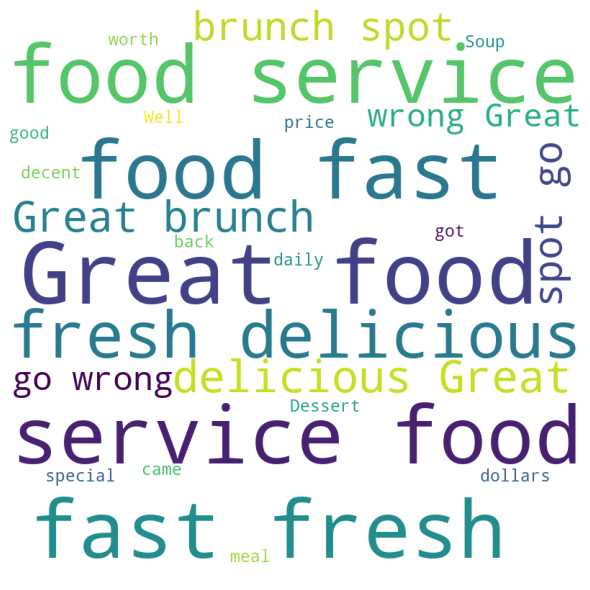

In [131]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()